<a href="https://colab.research.google.com/github/Payal1809/Machine-Learning-Projects-/blob/main/IgFold%20WORKING%206%20OCT%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IgFold**: Fast, accurate antibody structure prediction

Official notebook for [IgFold](https://www.biorxiv.org/content/10.1101/2022.04.20.488972): Fast, accurate antibody structure prediction from deep learning on massive set of natural antibodies.  The code, data, and weights for this work are made available for non-commercial use. For commercial inquiries, please contact `jruffolo[at]jhu.edu`.

In [1]:
#@title Input antibody Fv sequences then press `Runtime` -> `Run all`

import os
import sys

python_version = f"{sys.version_info.major}.{sys.version_info.minor}"

name = "my_antibody" #@param {type:"string"}
pred_dir = name
os.makedirs(pred_dir, exist_ok=True)

#@markdown Enter antibody sequences for structure prediction. To predict a nanobody structure (or an individual heavy or light chain), simply provide one sequence.
heavy_sequence = "EVQLVQSGPEVKKPGTSVKVSCKASGFTFMSSAVQWVRQARGQRLEWIGWIVIGSGNTNYAQKFQERVTITRDMSTSTAYMELSSLRSEDTAVYYCAAPYCSSISCNDGFDIWGQGTMVTVS" #@param {type:"string"}
light_sequence = "DVVMTQTPFSLPVSLGDQASISCRSSQSLVHSNGNTYLHWYLQKPGQSPKLLIYKVSNRFSGVPDRFSGSGSGTDFTLKISRVEAEDLGVYFCSQSTHVPYTFGGGTKLEIK" #@param {type:"string"}

sequences = {}
if len(heavy_sequence) > 0:
    sequences["H"] = heavy_sequence
if len(light_sequence) > 0:
    sequences["L"] = light_sequence

#@markdown Perform structural refinement with OpenMM
do_refine = True #@param {type:"boolean"}
#@markdown Renumber predicted antibody structure (Chothia) with AbNumber
do_renum = False #@param {type:"boolean"}
#@markdown Use only a single model for predictions (instead of model ensemble)
single_model = False #@param {type:"boolean"}

In [6]:
#@title Install dependencies

PYTHON_VERSION = python_version

if not os.path.isfile("CONDA_READY"):
  print("installing conda...")
  os.system("wget -qnc https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh")
  os.system("bash Mambaforge-colab-Linux-x86_64.sh -bfp /usr/local")
  os.system("mamba config --set auto_update_conda false")
  os.system("touch CONDA_READY")

if not os.path.isfile("CODE_READY"):
  print("installing igfold...")
  torch_string = "torch==1.11.0+cu113 torchvision==0.12.0+cu113 -f https://download.pytorch.org/whl/torch_stable.html"
  os.system(f"pip3 install {torch_string}")
  os.system(f"pip install 'igfold>=0.3.0' {torch_string}")
  os.system("pip install -q --no-warn-conflicts 'py3Dmol>=2.0.1' matplotlib seaborn")
  os.system("touch CODE_READY")

if do_refine and not os.path.isfile("AMBER_READY"):
  print("installing amber and pdbfixer...")
  os.system(f"mamba install -y -q -c conda-forge openmm=7.7.0 python='{PYTHON_VERSION}' pdbfixer 2>&1 1>/dev/null")
  os.system("touch AMBER_READY")

if do_renum and not os.path.isfile("ABNUMBER_READY"):
  print("installing abnumber...")
  os.system(f"mamba install -y -q -c bioconda abnumber python='{PYTHON_VERSION}' 2>&1 1>/dev/null")
  os.system("pip install pandas --force-reinstall")
  os.system("touch ABNUMBER_READY")

In [19]:
import torch


In [16]:
!pwd

/content


ERROR: Could not find a version that satisfies the requirement pdbfixer (from versions: none)
ERROR: No matching distribution found for pdbfixer


In [7]:
#@title Predict antibody structure with IgFold

if f"/usr/local/lib/python{python_version}/site-packages/" not in sys.path:
    sys.path.insert(0, f"/usr/local/lib/python{python_version}/site-packages/")

from igfold.utils.visualize import *
from transformers.models.bert.configuration_bert import BertConfig
torch.serialization.add_safe_globals([BertConfig])
from igfold import IgFoldRunner

num_models = 1 if single_model else 4
igfold = IgFoldRunner(num_models=num_models)

pred_pdb = os.path.join(pred_dir, f"{name}.pdb")
pred = igfold.fold(
    pred_pdb,
    sequences=sequences,
    do_refine=do_refine,
    use_openmm=True,
    do_renum=do_renum,
)
show_pdb(pred_pdb, len(sequences), bb_sticks=False, sc_sticks=True, color="rainbow")


    The code, data, and weights for this work are made available for non-commercial use 
    (including at commercial entities) under the terms of the JHU Academic Software License 
    Agreement. For commercial inquiries, please contact awichma2[at]jhu.edu.
    License: https://github.com/Graylab/IgFold/blob/main/LICENSE.md
    
Loading 4 IgFold models...
Using device: cpu
Loading /usr/local/lib/python3.12/dist-packages/igfold/trained_models/IgFold/igfold_1.ckpt...
Loading /usr/local/lib/python3.12/dist-packages/igfold/trained_models/IgFold/igfold_2.ckpt...
Loading /usr/local/lib/python3.12/dist-packages/igfold/trained_models/IgFold/igfold_3.ckpt...
Loading /usr/local/lib/python3.12/dist-packages/igfold/trained_models/IgFold/igfold_5.ckpt...
Successfully loaded 4 IgFold models.
Loaded AntiBERTy model.


/usr/local/lib/python3.12/dist-packages/igfold/model/components/IPABlock.py:160: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with disable_tf32(), autocast(enabled = False):


NameError: name 'exit' is not defined

In [13]:
os.makedirs(pred_dir, exist_ok=True)

if f"/usr/local/lib/python{python_version}/site-packages/" not in sys.path:
    sys.path.insert(0, f"/usr/local/lib/python{python_version}/site-packages/")

print("✓ Importing IgFold...")
from igfold.utils.visualize import *
from igfold import IgFoldRunner

num_models = 1 if single_model else 4
print(f"✓ Initializing IgFold with {num_models} model(s)...")
igfold = IgFoldRunner(num_models=num_models)

pred_pdb = os.path.join(pred_dir, f"{name}.pdb")
print("✓ Starting structure prediction...")

pred = igfold.fold(
    pred_pdb,
    sequences=sequences,
    do_refine=False,
    use_openmm=False,
    do_renum=do_renum,
)

print(f"✅ SUCCESS! Structure saved to: {pred_pdb}")
show_pdb(pred_pdb, len(sequences), bb_sticks=False, sc_sticks=True, color="rainbow")

✓ Importing IgFold...
✓ Initializing IgFold with 1 model(s)...

    The code, data, and weights for this work are made available for non-commercial use 
    (including at commercial entities) under the terms of the JHU Academic Software License 
    Agreement. For commercial inquiries, please contact awichma2[at]jhu.edu.
    License: https://github.com/Graylab/IgFold/blob/main/LICENSE.md
    
Loading 1 IgFold models...
Using device: cpu
Loading /usr/local/lib/python3.12/dist-packages/igfold/trained_models/IgFold/igfold_1.ckpt...
Successfully loaded 1 IgFold models.
Loaded AntiBERTy model.
✓ Starting structure prediction...


/usr/local/lib/python3.12/dist-packages/igfold/model/components/IPABlock.py:160: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with disable_tf32(), autocast(enabled = False):


NameError: name 'exit' is not defined

In [14]:
os.makedirs(pred_dir, exist_ok=True)

if f"/usr/local/lib/python{python_version}/site-packages/" not in sys.path:
    sys.path.insert(0, f"/usr/local/lib/python{python_version}/site-packages/")

from igfold.utils.visualize import *
from igfold import IgFoldRunner

num_models = 1 if single_model else 4
igfold = IgFoldRunner(num_models=num_models)

pred_pdb = os.path.join(pred_dir, f"{name}.pdb")
pred = igfold.fold(
    pred_pdb,
    sequences=sequences,
    do_refine=False,
    use_openmm=False,
    do_renum=do_renum,
)
show_pdb(pred_pdb, len(sequences), bb_sticks=False, sc_sticks=True, color="rainbow")


    The code, data, and weights for this work are made available for non-commercial use 
    (including at commercial entities) under the terms of the JHU Academic Software License 
    Agreement. For commercial inquiries, please contact awichma2[at]jhu.edu.
    License: https://github.com/Graylab/IgFold/blob/main/LICENSE.md
    
Loading 1 IgFold models...
Using device: cpu
Loading /usr/local/lib/python3.12/dist-packages/igfold/trained_models/IgFold/igfold_1.ckpt...
Successfully loaded 1 IgFold models.
Loaded AntiBERTy model.
Completed folding in 7.68 seconds.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

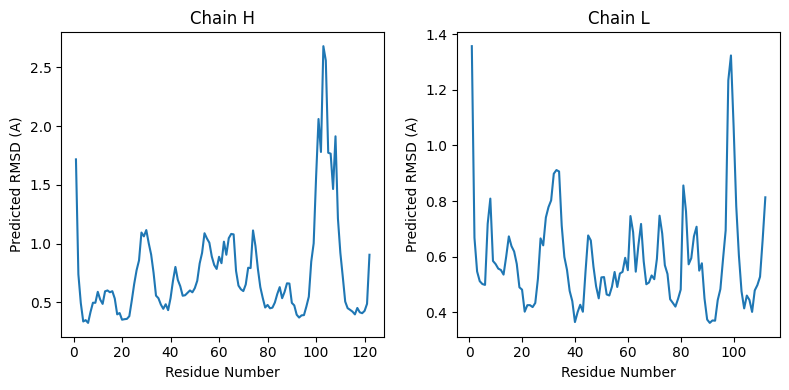

In [10]:
#@title Plot per-residue predicted RMSD

prmsd_fig_file = os.path.join(pred_dir, f"{name}_prmsd.png")
plot_prmsd(sequences, pred.prmsd.cpu(), prmsd_fig_file, shade_cdr=do_renum, pdb_file=pred_pdb)

In [11]:
#@title Show predicted structure with predicted RMSD

#@markdown Structure is colored from low (blue) to high (red) pRMSD.

show_pdb(pred_pdb, len(sequences), bb_sticks=False, sc_sticks=True, color="b")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
#@title Download results

#@markdown Download zip file containing structure prediction and annotation results. If download fails, results are also accessible from file explorer on the left panel of the notebook.

from google.colab import files
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!zip -FSr $name".result.zip" $pred_dir/ &> /dev/null
files.download(f"{name}.result.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>